In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(context='notebook');
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

https://www.synapse.org/#!Synapse:syn21763589/wiki/602309

In [2]:
ls

2020-07-26_EDA.ipynb                drug_activity_to_inchikey.txt*
data_achilles_shRNA_DREAMv2.csv*    rnaseq/
data_ccle_RNAseq_DREAMv2_FIXED.csv* rnaseq_concealed/
drug_activity_challenge_rnaseq.zip* rnaseq_concealed.zip*
drug_activity_to_inchi.txt*


## Achilles

In [2]:
achilles = pd.read_csv("data_achilles_shRNA_DREAMv2.csv")
achilles.head()

,Unnamed: 0,A101D,A172,A204,A2058,A253,A2780,A375,A3KAW,A498,...,WM2664,WM793,WM88,WM983B,WSUDLCL2,YD38,YD8,YKG1,ZR751,ZR7530
0,A1BG,NaN,0.012675,0.201401,-0.146676,NaN,NaN,-0.182732,-0.080464,NaN,...,-0.326934,0.070636,-0.088267,0.002171,NaN,0.120294,0.012540,0.111530,-0.079313,-0.141559
1,NAT2,NaN,-0.058938,-0.357361,-0.003113,NaN,NaN,-0.036114,-0.050468,NaN,...,-0.107795,-0.126943,-0.003747,-0.321445,NaN,-0.003256,-0.220472,0.073460,-0.130921,0.127358
2,ADA,NaN,0.028173,0.158644,0.052616,NaN,NaN,0.081343,-0.047190,NaN,...,0.029538,0.346389,-0.014085,0.039679,NaN,0.076521,0.106995,0.227977,-0.134479,0.083506
3,CDH2,0.095038,-0.285766,0.498370,-0.044655,-0.02795,0.170724,-0.165399,0.317836,-0.130849,...,-0.166268,0.002938,-0.073435,-0.140041,-0.154436,-0.040308,-0.078707,0.000769,0.047022,-0.097644
4,AKT3,0.084754,-0.007406,-0.256909,-0.003486,-0.03453,0.224610,0.004111,0.466874,0.143616,...,-0.121801,-0.007509,0.028714,-0.054628,0.450581,0.002932,0.129679,-0.072564,0.123615,0.046846


In [4]:
achilles.shape

(17309, 516)

The drug perturbational RNAseq profiles of 11 cell lines for 30 chosen compounds will be provided to challenge participants, without revealing the identity of the drugs.

In addition, RNAseq and mRNA-dependency data will be provided for 515 cell-lines from the Cancer Cell-Line Encyclopedia (CCLE) and Achilles databases respectively. This challenge asks participants to combine these three datasets to predict drug-sensitivity for the 30 anonymized drugs across 515 cell-lines given the fact:
PANACEA drug-perturbed RNAseq
This dataset links each drug to differential-mRNA (drug -> mRNA-change). It is in the form of PLATE-Seq expression matrices for 11 cell lines and 30 compounds. Each matrix (csv) is formatted as follows:
the first column, hgnc_symbol, contains the HUGO gene identifier for each row.
the remaining columns follow this format:
<drug_id>
<dose in uM>
<time point in hours>
<cell line name>
<replicate>

In [3]:
achilles.columns

Index(['Unnamed: 0', 'A101D', 'A172', 'A204', 'A2058', 'A253', 'A2780', 'A375',
       'A3KAW', 'A498',
       ...
       'WM2664', 'WM793', 'WM88', 'WM983B', 'WSUDLCL2', 'YD38', 'YD8', 'YKG1',
       'ZR751', 'ZR7530'],
      dtype='object', length=516)

In [6]:
achilles.isnull().any()

Unnamed: 0    False
A101D          True
A172           True
A204           True
A2058          True
              ...  
YD38           True
YD8            True
YKG1           True
ZR751          True
ZR7530         True
Length: 516, dtype: bool

### RNA-Seq

Q:
- What the distribution of normalised counts between untreated and DMSO?
- What are the distribution of normalised counts for each gene across cell line, drug,
 dosage, time point?
- Are we using log2(A1/A2) to compare different conditions?

In [3]:
ls

2020-07-26_EDA.ipynb                drug_activity_to_inchikey.txt*
data_achilles_shRNA_DREAMv2.csv*    rnaseq/
data_ccle_RNAseq_DREAMv2_FIXED.csv* rnaseq_concealed/
drug_activity_challenge_rnaseq.zip* rnaseq_concealed.zip*
drug_activity_to_inchi.txt*


In [3]:
ls rnaseq/

ASPC1-RNAseq-Perturbations.csv*   HSTS-RNAseq-Perturbations.csv*
DU145-RNAseq-Perturbations.csv*   KRJ1-RNAseq-Perturbations.csv*
EFO21-RNAseq-Perturbations.csv*   LNCAP-RNAseq-Perturbations.csv*
H1793-RNAseq-Perturbations.csv*   PANC1-RNAseq-Perturbations.csv*
HCC1143-RNAseq-Perturbations.csv* U87-RNAseq-Perturbations.csv*
HF2597-RNAseq-Perturbations.csv*


In [2]:
aspc1 = pd.read_csv("rnaseq/ASPC1-RNAseq-Perturbations.csv")
aspc1.head()

,Unnamed: 0,DMSO_0_24_ASPC1,DMSO_0_24_ASPC1.1,UNTREATED_0_24_ASPC1,DMSO_0_24_ASPC1.2,UNTREATED_0_24_ASPC1.1,DMSO_0_24_ASPC1.3,UNTREATED_0_24_ASPC1.2,DMSO_0_24_ASPC1.4,UNTREATED_0_24_ASPC1.3,...,UNTREATED_0_24_ASPC1.54,DMSO_0_24_ASPC1.56,UNTREATED_0_24_ASPC1.55,DMSO_0_24_ASPC1.57,UNTREATED_0_24_ASPC1.56,DMSO_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.57,DMSO_0_24_ASPC1.59,UNTREATED_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.59
0,DDX11L1,11.785438,11.797613,11.771380,11.793581,11.781772,11.783283,11.789473,11.782482,11.784768,...,11.776024,11.785603,11.803635,11.791175,11.782758,11.783898,11.795973,11.788878,11.776507,11.787157
1,MIR6859-1,11.777003,11.771146,11.788737,11.794551,11.774662,11.795183,11.788741,11.790229,11.792712,...,11.780836,11.791450,11.764773,11.793298,11.788702,11.788341,11.792424,11.787538,11.784161,11.778710
2,MIR1302-2,11.794012,11.775589,11.785965,11.788804,11.792377,11.784300,11.778412,11.780364,11.781933,...,11.805054,11.785422,11.784409,11.773451,11.795937,11.777230,11.794820,11.790036,11.794736,11.784662
3,FAM138A,11.787199,11.782328,11.770552,11.779456,11.784175,11.774218,11.779154,11.773683,11.782536,...,11.787741,11.786413,11.795858,11.784080,11.782555,11.794497,11.785193,11.783233,11.769074,11.789967
4,OR4F5,11.789625,11.796473,11.791192,11.790422,11.777537,11.792692,11.793841,11.789417,11.788608,...,11.783087,11.785888,11.785830,11.782270,11.792847,11.794159,11.786462,11.787415,11.780066,11.772575


In [8]:
aspc1.tail()

,Unnamed: 0,DMSO_0_24_ASPC1,DMSO_0_24_ASPC1.1,UNTREATED_0_24_ASPC1,DMSO_0_24_ASPC1.2,UNTREATED_0_24_ASPC1.1,DMSO_0_24_ASPC1.3,UNTREATED_0_24_ASPC1.2,DMSO_0_24_ASPC1.4,UNTREATED_0_24_ASPC1.3,...,UNTREATED_0_24_ASPC1.54,DMSO_0_24_ASPC1.56,UNTREATED_0_24_ASPC1.55,DMSO_0_24_ASPC1.57,UNTREATED_0_24_ASPC1.56,DMSO_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.57,DMSO_0_24_ASPC1.59,UNTREATED_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.59
23334,TTTY4C,11.780585,11.780012,11.793569,11.788111,11.766342,11.780134,11.770226,11.786802,11.779596,...,11.786706,11.778832,11.787328,11.783475,11.789076,11.799591,11.783503,11.778583,11.785980,11.798895
23335,TTTY17C,11.783994,11.781855,11.781676,11.779693,11.770875,11.784517,11.767821,11.799305,11.786209,...,11.789729,11.776584,11.780854,11.790733,11.788310,11.784594,11.783902,11.776703,11.790346,11.791547
23336,CSPG4P1Y,11.788641,11.794087,11.781863,11.778995,11.792220,11.776765,11.782747,11.777369,11.774677,...,11.794770,11.786007,11.769212,11.775100,11.783178,11.788194,11.788870,11.794581,11.782289,11.776004
23337,CDY1,11.783949,11.790785,11.787929,11.795436,11.779236,11.782899,11.787644,11.774367,11.791786,...,11.760743,11.784446,11.782683,11.781492,11.782485,11.786230,11.780217,11.785146,11.794934,11.789233
23338,TTTY3,11.776076,11.782730,11.786232,11.789616,11.789653,11.792115,11.784806,11.795861,11.773449,...,11.793433,11.784186,11.771730,11.800435,11.786660,11.783314,11.780663,11.781632,11.787234,11.787144


In [5]:
aspc1.shape

(23339, 185)

In [35]:
aspc1.sum(axis=0)

genes                      DDX11L1MIR6859-1MIR1302-2FAM138AOR4F5MIR6859-2...
DMSO_0_24_ASPC1                                                       309277
DMSO_0_24_ASPC1.1                                                     309280
UNTREATED_0_24_ASPC1                                                  309297
DMSO_0_24_ASPC1.2                                                     309287
                                                 ...                        
DMSO_0_24_ASPC1.58                                                    309129
UNTREATED_0_24_ASPC1.57                                               309109
DMSO_0_24_ASPC1.59                                                    309144
UNTREATED_0_24_ASPC1.58                                               309097
UNTREATED_0_24_ASPC1.59                                               309185
Length: 185, dtype: object

In [36]:
aspc1.sum(axis=1)

0        2168.540491
1        2168.263139
2        2168.621157
3        2168.213423
4        2168.373875
            ...     
23334    2168.436671
23335    2168.228597
23336    2168.415447
23337    2168.274616
23338    2168.414578
Length: 23339, dtype: float64

In [3]:
aspc1.columns[:100]

Index(['Unnamed: 0', 'DMSO_0_24_ASPC1', 'DMSO_0_24_ASPC1.1',
       'UNTREATED_0_24_ASPC1', 'DMSO_0_24_ASPC1.2', 'UNTREATED_0_24_ASPC1.1',
       'DMSO_0_24_ASPC1.3', 'UNTREATED_0_24_ASPC1.2', 'DMSO_0_24_ASPC1.4',
       'UNTREATED_0_24_ASPC1.3', 'DMSO_0_24_ASPC1.5', 'UNTREATED_0_24_ASPC1.4',
       'UNTREATED_0_24_ASPC1.5', 'DMSO_0_24_ASPC1.6', 'ICOTINIB_7.5_24_ASPC1',
       'DMSO_0_24_ASPC1.7', 'CEDIRANIB_0.22_24_ASPC1',
       'QUIZARTINIB_1.5_24_ASPC1', 'UNTREATED_0_24_ASPC1.6',
       'DMSO_0_24_ASPC1.8', 'CRIZOTINIB_0.19_24_ASPC1',
       'UNTREATED_0_24_ASPC1.7', 'DMSO_0_24_ASPC1.9',
       'VANDETANIB_0.11_24_ASPC1', 'AEE788_0.17_24_ASPC1',
       'UNTREATED_0_24_ASPC1.8', 'DMSO_0_24_ASPC1.10',
       'NILOTINIB_0.335_24_ASPC1', 'DACOMITINIB_0.05_24_ASPC1',
       'CRENOLANIB_0.145_24_ASPC1', 'UNTREATED_0_24_ASPC1.9',
       'DMSO_0_24_ASPC1.11', 'DOVITINIB_2_24_ASPC1', 'MGCD265_1_24_ASPC1',
       'BAFETINIB_2_24_ASPC1', 'UNTREATED_0_24_ASPC1.10',
       'AZD5363_0.02_24_ASPC

In [10]:
aspc1.columns[100:]

Index(['DMSO_0_24_ASPC1.34', 'UNTREATED_0_24_ASPC1.33', 'DMSO_0_24_ASPC1.35',
       'UNTREATED_0_24_ASPC1.34', 'UNTREATED_0_24_ASPC1.35',
       'DMSO_0_24_ASPC1.36', 'ICOTINIB_7.5_24_ASPC1.1', 'DMSO_0_24_ASPC1.37',
       'CEDIRANIB_0.22_24_ASPC1.1', 'QUIZARTINIB_1.5_24_ASPC1.1',
       'UNTREATED_0_24_ASPC1.36', 'DMSO_0_24_ASPC1.38',
       'CRIZOTINIB_0.19_24_ASPC1.1', 'UNTREATED_0_24_ASPC1.37',
       'DMSO_0_24_ASPC1.39', 'VANDETANIB_0.11_24_ASPC1.1',
       'AEE788_0.17_24_ASPC1.1', 'UNTREATED_0_24_ASPC1.38',
       'DMSO_0_24_ASPC1.40', 'NILOTINIB_0.335_24_ASPC1.1',
       'DACOMITINIB_0.05_24_ASPC1.1', 'CRENOLANIB_0.145_24_ASPC1.1',
       'UNTREATED_0_24_ASPC1.39', 'DMSO_0_24_ASPC1.41',
       'DOVITINIB_2_24_ASPC1.1', 'MGCD265_1_24_ASPC1.1',
       'BAFETINIB_2_24_ASPC1.1', 'UNTREATED_0_24_ASPC1.40',
       'AZD5363_0.02_24_ASPC1.1', 'IMATINIB_5_24_ASPC1.1',
       'UNTREATED_0_24_ASPC1.41', 'DMSO_0_24_ASPC1.42', 'DMSO_0_24_ASPC1.43',
       'GEFITINIB_0.5_24_ASPC1.1', 'UNTR

In [3]:
def rename_first_col(df):
    df.rename(columns={"Unnamed: 0": "genes"}, inplace=True)
    return df

In [4]:
aspc1 = rename_first_col(aspc1)
aspc1.head()

,genes,DMSO_0_24_ASPC1,DMSO_0_24_ASPC1.1,UNTREATED_0_24_ASPC1,DMSO_0_24_ASPC1.2,UNTREATED_0_24_ASPC1.1,DMSO_0_24_ASPC1.3,UNTREATED_0_24_ASPC1.2,DMSO_0_24_ASPC1.4,UNTREATED_0_24_ASPC1.3,...,UNTREATED_0_24_ASPC1.54,DMSO_0_24_ASPC1.56,UNTREATED_0_24_ASPC1.55,DMSO_0_24_ASPC1.57,UNTREATED_0_24_ASPC1.56,DMSO_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.57,DMSO_0_24_ASPC1.59,UNTREATED_0_24_ASPC1.58,UNTREATED_0_24_ASPC1.59
0,DDX11L1,11.785438,11.797613,11.771380,11.793581,11.781772,11.783283,11.789473,11.782482,11.784768,...,11.776024,11.785603,11.803635,11.791175,11.782758,11.783898,11.795973,11.788878,11.776507,11.787157
1,MIR6859-1,11.777003,11.771146,11.788737,11.794551,11.774662,11.795183,11.788741,11.790229,11.792712,...,11.780836,11.791450,11.764773,11.793298,11.788702,11.788341,11.792424,11.787538,11.784161,11.778710
2,MIR1302-2,11.794012,11.775589,11.785965,11.788804,11.792377,11.784300,11.778412,11.780364,11.781933,...,11.805054,11.785422,11.784409,11.773451,11.795937,11.777230,11.794820,11.790036,11.794736,11.784662
3,FAM138A,11.787199,11.782328,11.770552,11.779456,11.784175,11.774218,11.779154,11.773683,11.782536,...,11.787741,11.786413,11.795858,11.784080,11.782555,11.794497,11.785193,11.783233,11.769074,11.789967
4,OR4F5,11.789625,11.796473,11.791192,11.790422,11.777537,11.792692,11.793841,11.789417,11.788608,...,11.783087,11.785888,11.785830,11.782270,11.792847,11.794159,11.786462,11.787415,11.780066,11.772575


In [37]:
aspc1.genes.nunique()

23339

#### Melt DF

In [5]:
def melt_df(df):
    melted = pd.melt(df, id_vars=["genes"], var_name="treatment", value_name="norm_count")
    return melted

In [6]:
melted_aspc1 = melt_df(aspc1)
melted_aspc1.head()

,genes,treatment,norm_count
0,DDX11L1,DMSO_0_24_ASPC1,11.785438
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012
3,FAM138A,DMSO_0_24_ASPC1,11.787199
4,OR4F5,DMSO_0_24_ASPC1,11.789625


In [7]:
def split_trtment_col(melted_df, col="treatment"):
    treatment_split = melted_df[col].str.split("_", expand=True).rename(columns={0: "compound_id",
                                                            1: "dose_uM",
                                                            2: "tmpt_h",
                                                            3: "cell_line"})
    return treatment_split

In [8]:
treatment_split = split_trtment_col(melted_aspc1)
treatment_split.head()

,compound_id,dose_uM,tmpt_h,cell_line
0,DMSO,0,24,ASPC1
1,DMSO,0,24,ASPC1
2,DMSO,0,24,ASPC1
3,DMSO,0,24,ASPC1
4,DMSO,0,24,ASPC1


In [9]:
treatment_split.compound_id.unique()

array(['DMSO', 'UNTREATED', 'ICOTINIB', 'CEDIRANIB', 'QUIZARTINIB',
       'CRIZOTINIB', 'VANDETANIB', 'AEE788', 'NILOTINIB', 'DACOMITINIB',
       'CRENOLANIB', 'DOVITINIB', 'MGCD265', 'BAFETINIB', 'AZD5363',
       'IMATINIB', 'GEFITINIB', 'DASATINIB', 'AFATINIB', 'SUNITINIB',
       'PONATINIB', 'OSIMERTINIB', 'SORAFENIB', 'BOSUTINIB', 'LAPATINIB',
       'CABOZANTINIB', 'VARLITINIB', 'LINIFANIB', 'MK2206', 'REGORAFENIB',
       'TIVANTINIB', 'FORETINIB', 'NERATINIB', 'KW2449'], dtype=object)

In [ ]:
treatment_split.cell_line.nunique()

In [10]:
treatment_split.shape

(4294376, 4)

In [9]:
melted_02 = melted_aspc1.join(treatment_split)
melted_02.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0,24,ASPC1
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0,24,ASPC1
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0,24,ASPC1
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0,24,ASPC1
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0,24,ASPC1


In [10]:
def make_replicate_col(df):
    df["replicate"] = df.cell_line.str.split(".", expand=True)[1].fillna(0)
    return df

In [11]:
melted_02 = make_replicate_col(melted_02)
melted_02.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0,24,ASPC1,0
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0,24,ASPC1,0
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0,24,ASPC1,0
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0,24,ASPC1,0
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0,24,ASPC1,0


In [12]:
melted_02.tail()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
4294371,TTTY4C,UNTREATED_0_24_ASPC1.59,11.798895,UNTREATED,0,24,ASPC1.59,59
4294372,TTTY17C,UNTREATED_0_24_ASPC1.59,11.791547,UNTREATED,0,24,ASPC1.59,59
4294373,CSPG4P1Y,UNTREATED_0_24_ASPC1.59,11.776004,UNTREATED,0,24,ASPC1.59,59
4294374,CDY1,UNTREATED_0_24_ASPC1.59,11.789233,UNTREATED,0,24,ASPC1.59,59
4294375,TTTY3,UNTREATED_0_24_ASPC1.59,11.787144,UNTREATED,0,24,ASPC1.59,59


This table is too big and it needs to be sampled.

In [13]:
ls

2020-07-26_EDA.ipynb                drug_activity_to_inchikey.txt*
data_achilles_shRNA_DREAMv2.csv*    rnaseq/
data_ccle_RNAseq_DREAMv2_FIXED.csv* rnaseq_concealed/
drug_activity_challenge_rnaseq.zip* rnaseq_concealed.zip*
drug_activity_to_inchi.txt*


In [12]:
melted_02.to_csv("../02_Transformed_Data/2020-08-04_Melted_ASPC1.csv", index=False)

In [9]:
melted_02.shape

(4294376, 8)

In [12]:
small_melt = melted_02.sample(frac=0.2, random_state=1)
small_melt.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
3091948,BMS1,GEFITINIB_0.5_24_ASPC1.1,14.666120,GEFITINIB,0.5,24,ASPC1.1,1
410697,SPRYD4,UNTREATED_0_24_ASPC1.6,15.702338,UNTREATED,0,24,ASPC1.6,6
2179601,TAS2R5,DMSO_0_24_ASPC1.31,11.779345,DMSO,0,24,ASPC1.31,31
713081,LRRC32,DMSO_0_24_ASPC1.11,11.918707,DMSO,0,24,ASPC1.11,11
1898581,PLG,DMSO_0_24_ASPC1.25,11.784300,DMSO,0,24,ASPC1.25,25


In [13]:
small_melt.shape

(858875, 8)

In [14]:
small_melt.describe()

,norm_count
count,858875.000000
mean,13.253697
std,1.777788
min,11.655529
25%,11.855403
50%,12.408325
75%,14.279028
max,24.791059


In [15]:
small_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858875 entries, 3091948 to 2400382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   genes        858875 non-null  object 
 1   treatment    858875 non-null  object 
 2   norm_count   858875 non-null  float64
 3   compound_id  858875 non-null  object 
 4   dose_uM      858875 non-null  object 
 5   tmpt_h       858875 non-null  object 
 6   cell_line    858875 non-null  object 
 7   replicate    858875 non-null  object 
dtypes: float64(1), object(7)
memory usage: 59.0+ MB


In [19]:
# Convert dose_uM, tmpt_h into int
small_melt.dose_uM_uM, small_melt.tmpt_h = small_melt.dose_uM.astype(float), small_melt.tmpt_h.astype(int)

In [20]:
small_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858875 entries, 3091948 to 2400382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   genes        858875 non-null  object 
 1   treatment    858875 non-null  object 
 2   norm_count   858875 non-null  float64
 3   compound_id  858875 non-null  object 
 4   dose_uM      858875 non-null  float64
 5   tmpt_h       858875 non-null  int64  
 6   cell_line    858875 non-null  object 
 7   replicate    858875 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 99.0+ MB


In [21]:
small_melt.tail()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
468075,MIR6077,UNTREATED_0_24_ASPC1.7,11.801033,UNTREATED,0.000,24,ASPC1.7,7
292669,TMEM223,DMSO_0_24_ASPC1.6,14.812045,DMSO,0.000,24,ASPC1.6,6
2775175,SDC4,NILOTINIB_0.335_24_ASPC1.1,15.631452,NILOTINIB,0.335,24,ASPC1.1,1
1094090,ERVV-1,UNTREATED_0_24_ASPC1.14,11.829442,UNTREATED,0.000,24,ASPC1.14,14
2400382,ZNF431,UNTREATED_0_24_ASPC1.34,14.383492,UNTREATED,0.000,24,ASPC1.34,34


In [27]:
# small_melt.groupby(["compound_id"]).agg({"norm_count":np.median})
small_melt.compound_id.unique()

array(['GEFITINIB', 'UNTREATED', 'DMSO', 'NILOTINIB', 'BAFETINIB',
       'REGORAFENIB', 'MGCD265', 'VANDETANIB', 'DASATINIB', 'MK2206',
       'QUIZARTINIB', 'FORETINIB', 'PONATINIB', 'OSIMERTINIB', 'AFATINIB',
       'DOVITINIB', 'CRENOLANIB', 'AZD5363', 'TIVANTINIB', 'LAPATINIB',
       'SUNITINIB', 'BOSUTINIB', 'ICOTINIB', 'AEE788', 'CEDIRANIB',
       'DACOMITINIB', 'NERATINIB', 'SORAFENIB', 'IMATINIB', 'KW2449',
       'CABOZANTINIB', 'VARLITINIB', 'CRIZOTINIB', 'LINIFANIB'],
      dtype=object)

In [32]:
small_melt.cell_line.nunique()

60

In [33]:
small_melt.cell_line.unique()

array(['ASPC1.1', 'ASPC1.6', 'ASPC1.31', 'ASPC1.11', 'ASPC1.25',
       'ASPC1.20', 'ASPC1.59', 'ASPC1.38', 'ASPC1.26', 'ASPC1.46',
       'ASPC1', 'ASPC1.5', 'ASPC1.33', 'ASPC1.54', 'ASPC1.4', 'ASPC1.57',
       'ASPC1.22', 'ASPC1.9', 'ASPC1.14', 'ASPC1.32', 'ASPC1.50',
       'ASPC1.39', 'ASPC1.40', 'ASPC1.49', 'ASPC1.34', 'ASPC1.3',
       'ASPC1.48', 'ASPC1.16', 'ASPC1.45', 'ASPC1.51', 'ASPC1.35',
       'ASPC1.23', 'ASPC1.24', 'ASPC1.19', 'ASPC1.21', 'ASPC1.17',
       'ASPC1.13', 'ASPC1.56', 'ASPC1.2', 'ASPC1.37', 'ASPC1.53',
       'ASPC1.41', 'ASPC1.44', 'ASPC1.29', 'ASPC1.12', 'ASPC1.7',
       'ASPC1.27', 'ASPC1.10', 'ASPC1.30', 'ASPC1.52', 'ASPC1.28',
       'ASPC1.18', 'ASPC1.8', 'ASPC1.42', 'ASPC1.55', 'ASPC1.15',
       'ASPC1.43', 'ASPC1.47', 'ASPC1.58', 'ASPC1.36'], dtype=object)

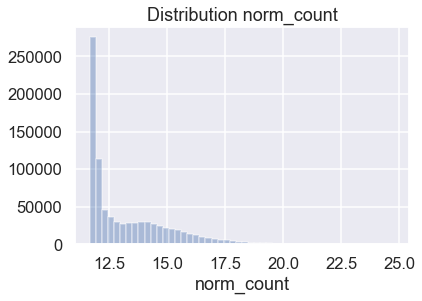

In [30]:
sns.distplot(small_melt.norm_count, kde=False);
plt.title("Distribution norm_count");

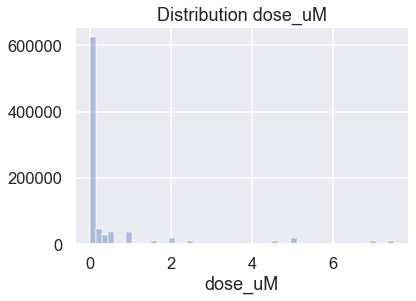

In [31]:
sns.distplot(small_melt.dose_uM, kde=False);
plt.title("Distribution dose_uM");

### What is the difference between the dex and untreated?

In [2]:
melted_02 = pd.read_csv("../02_Transformed_Data/2020-08-04_Melted_ASPC1.csv")
melted_02.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0.0,24,ASPC1,0
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0.0,24,ASPC1,0
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0.0,24,ASPC1,0
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0.0,24,ASPC1,0
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0.0,24,ASPC1,0


In [3]:
dmso_untrt = melted_02[melted_02.compound_id.isin(["DMSO", "UNTREATED"])]
dmso_untrt.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0.0,24,ASPC1,0
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0.0,24,ASPC1,0
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0.0,24,ASPC1,0
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0.0,24,ASPC1,0
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0.0,24,ASPC1,0


In [18]:
dmso_untrt.shape

(2800680, 8)

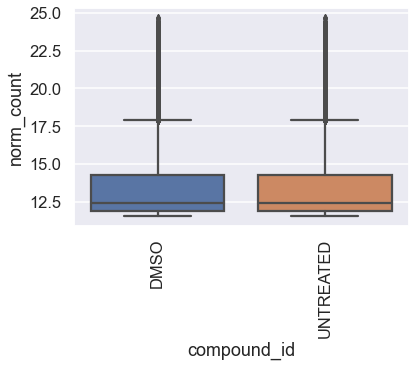

In [19]:
sns.boxplot(x="compound_id", y="norm_count", data=dmso_untrt);
plt.xticks(rotation=90);

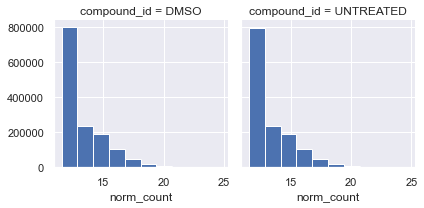

In [23]:
a = sns.FacetGrid(data=dmso_untrt, col="compound_id");
a = a.map(plt.hist, "norm_count");


What are the genes wich are giving over 17% reads for DMSO and untreated?

In [14]:
unique_genes_dmso_above17 = dmso_untrt.query("compound_id == 'DMSO' & norm_count > 17").genes
unique_genes_untrt_above17 = dmso_untrt.query("compound_id == 'UNTREATED' & norm_count > 17").genes


In [15]:
len(set(unique_genes_dmso_above17))

1744

In [16]:
len(set(unique_genes_untrt_above17))

1720

In [17]:
len(list(set(unique_genes_dmso_above17).intersection(set(unique_genes_untrt_above17))))

1600

We need to check the intersection between the genes expressed under dmso
and untreatment treatments

In [18]:
dmso_untrt_below17 = dmso_untrt.query("norm_count < 17")
dmso_untrt_below17.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0,24,ASPC1,0
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0,24,ASPC1,0
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0,24,ASPC1,0
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0,24,ASPC1,0
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0,24,ASPC1,0


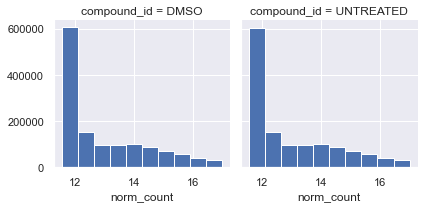

In [41]:
b = sns.FacetGrid(data=dmso_untrt_below17, col="compound_id")
b = b.map(plt.hist, "norm_count")

In [43]:
dmso_untrt_below17.query("compound_id == 'DMSO'").genes.nunique()

22759

In [44]:
dmso_untrt_below17.query("compound_id == 'UNTREATED'").genes.nunique()

22762

In [46]:
unique_g_dmso_below17 = dmso_untrt_below17.query("compound_id == 'DMSO'").genes
unique_g_untrt_below17 = dmso_untrt_below17.query("compound_id == 'UNTREATED'").genes

In [47]:
# How many genes are shared between untreated and dmso treatments?
len(list(set(unique_g_dmso_below17).intersection(set(unique_g_untrt_below17))))

22712

What is the median expression of each gene between dmso and untreated?

In [13]:
dmso_untrt.head()

,genes,treatment,norm_count,compound_id,dose_uM,tmpt_h,cell_line,replicate
0,DDX11L1,DMSO_0_24_ASPC1,11.785438,DMSO,0,24,ASPC1,0
1,MIR6859-1,DMSO_0_24_ASPC1,11.777003,DMSO,0,24,ASPC1,0
2,MIR1302-2,DMSO_0_24_ASPC1,11.794012,DMSO,0,24,ASPC1,0
3,FAM138A,DMSO_0_24_ASPC1,11.787199,DMSO,0,24,ASPC1,0
4,OR4F5,DMSO_0_24_ASPC1,11.789625,DMSO,0,24,ASPC1,0


In [ ]:
dmso_untrt.dose_uM.astype(int)

In [4]:
dmso_untrt_median = dmso_untrt.pivot_table("norm_count", index="genes", columns=["compound_id"],
                       aggfunc=np.median)
dmso_untrt_median.head()

compound_id,DMSO,UNTREATED
genes,,
A1BG,11.937038,11.939111
A1BG-AS1,11.912184,11.912596
A1CF,15.212558,15.489138
A2M,11.999227,11.997749
A2M-AS1,11.839354,11.837233


In [21]:
dmso_untrt_median.columns

Index(['DMSO', 'UNTREATED'], dtype='object', name='compound_id')

In [5]:
dmso_untrt_median['ratio_dmso_untrt'] = round(dmso_untrt_median.eval("DMSO / UNTREATED"), 3)
dmso_untrt_median.head()

compound_id,DMSO,UNTREATED,ratio_dmso_untrt
genes,,,
A1BG,11.937038,11.939111,1.000
A1BG-AS1,11.912184,11.912596,1.000
A1CF,15.212558,15.489138,0.982
A2M,11.999227,11.997749,1.000
A2M-AS1,11.839354,11.837233,1.000


In [6]:
dmso_untrt_median.reset_index(inplace=True)
dmso_untrt_median.head()

compound_id,genes,DMSO,UNTREATED,ratio_dmso_untrt
0,A1BG,11.937038,11.939111,1.000
1,A1BG-AS1,11.912184,11.912596,1.000
2,A1CF,15.212558,15.489138,0.982
3,A2M,11.999227,11.997749,1.000
4,A2M-AS1,11.839354,11.837233,1.000


In [31]:
dmso_untrt_median.columns

Index(['genes', 'DMSO', 'UNTREATED', 'ratio'], dtype='object', name='compound_id')

In [32]:
dmso_untrt_median.genes.nunique()

23339

In [ ]:
# plt.figure(figsize=(20,10));
# sns.barplot(x="genes", y="ratio", data=dmso_untrt_median);
# plt.title("Ratio DMSO/UNTREATED across all genes");
# plt.xticks(rotation=90);

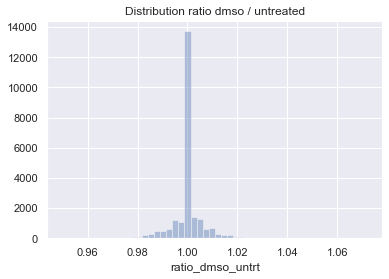

In [13]:
sns.distplot(dmso_untrt_median.ratio_dmso_untrt, kde=False);
plt.title("Distribution ratio dmso / untreated");

There is not much difference in the genes expressed under untreatment
of with DMSO

In [ ]:
WE HAVE STOPPED HERE!!

- What is the variance of this distribution?
- What are the characteristics of the genes which are more than 2SD away from the mean?

genes
A1BG        11.937038
A1BG-AS1    11.912184
A1CF        15.212558
A2M         11.999227
A2M-AS1     11.839354
              ...    
ZYG11A      11.914963
ZYG11B      14.824306
ZYX         17.406168
ZZEF1       13.574628
ZZZ3        14.006135
Name: DMSO, Length: 23339, dtype: float64

23339